# Programming for Data Analysis Assignment 1 Notebook

Author - Sean Humphreys

---

## Contents

1. [Introduction](#introduction)
2. [Definitions](#definitions)
3. [Dataset Exploration](#dataset-exploration)
4. [Dataset Variables](#dataset-variables)
5. [Random Probability Distribution](#random-probability-distribution)
4. [References](#references)
5. [Associated Reading](#associated-reading)

---

## Introduction <a id="introduction"></a>

The dataset explored and synthesised in this notebook is from a weather sensor in the author's back garden. The data extract is in the form of a csv. The source data csv can be accessed [here](datasets/back_garden_sensor_data_12_months.csv). The extract contains local weather data captured over a 12 month period.

---

## Definitions <a id="definitions"></a>

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accesssed 8 Nov. 2023) - is an opensource software library for creating static, animated, and interactive visualizations in Python.
- [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 8. Nov 2023) - is an opensource software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure.

---

## Dataset Exploration <a id="dataset-exploration"></a>

Import the Pandas software library. Pandas can be used to make datasets clean and process datasets.

In [21]:
# import the required python libraries
import pandas as pd

Read in the source data CSV file.

In [22]:
# use pandas to read in the dataset
garden_weather = pd.read_csv('datasets/back_garden_sensor_data_12_months.csv')

Visually inspect the top and bottom of the dataframe to ascertain if there is any obvious data quality issues. This is done using the Pandas `head()` and `tail()` methods. The frist and last 5 rows of data are checked.

In [23]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.head()

,Date Time,Wind Speed m/s,Gust m/s,Humidity %,Chill Celsius,Chill Minimum Celsius,Temperature Average Celsius,Temperature Range (low) Celsius,Temperature Range (high) Celsius,Air Pressure hPa
0,09/11/2022 00:00,3.3,6.7,84.0,12.9,11.8,12.74,12.4,13.0,1000.3
1,10/11/2022 00:00,3.2,11.5,81.0,16.9,12.1,14.59,12.3,16.9,1007.1
2,11/11/2022 00:00,3.1,12.5,82.0,16.9,14.4,15.40,14.4,16.9,1013.6
3,12/11/2022 00:00,0.6,2.3,87.0,13.6,12.6,13.27,12.6,13.6,1018.9
4,13/11/2022 00:00,0.8,5.5,87.0,14.8,12.3,13.95,12.3,14.8,1011.0


In [24]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.tail()

,Date Time,Wind Speed m/s,Gust m/s,Humidity %,Chill Celsius,Chill Minimum Celsius,Temperature Average Celsius,Temperature Range (low) Celsius,Temperature Range (high) Celsius,Air Pressure hPa
355,30/10/2023 00:00,0.0,0.6,93.000000,13.9,4.7,8.940000,4.7,13.9,989.5
356,31/10/2023 00:00,0.6,2.5,93.000000,15.9,5.5,9.910000,5.5,15.9,994.5
357,01/11/2023 00:00,2.5,7.6,90.000000,12.8,3.0,8.790000,3.0,12.9,979.7
358,02/11/2023 00:00,1.9,5.6,88.000000,12.4,4.9,7.640000,5.0,12.4,973.1
359,03/11/2023 00:00,2.0,8.3,89.601351,12.8,4.6,8.248322,5.3,12.8,981.0


Using Pandas the column names can be renamed to make them python friendly.

In [25]:
# python friendly columns list
column_rename = ['date_time', 'wind_speed_m_s', 'gust_m_s', 'humidity_%', 'chill_celsius', 'chill_minimum_celsius', 
                 'temperature_average_celsius', 'temperature_range_low_celsius', 'temperature_range_high_celsius', 'outside_air_pres_hPa']

# rename columns - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ [Accessed 7 Nov. 2023].
garden_weather.columns = column_rename

The Pandas `info()` method is used to print more information about the DataFrame. The renamed columns can be seen in the output of this command. The Pandas Dtype (datatype) is displayed.

In [26]:
# Code from https://www.w3schools.com/python/pandas/ref_df_info.asp [Accessed 7 Nov. 2023].
garden_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date_time                       360 non-null    object 
 1   wind_speed_m_s                  359 non-null    float64
 2   gust_m_s                        359 non-null    float64
 3   humidity_%                      359 non-null    float64
 4   chill_celsius                   359 non-null    float64
 5   chill_minimum_celsius           359 non-null    float64
 6   temperature_average_celsius     359 non-null    float64
 7   temperature_range_low_celsius   359 non-null    float64
 8   temperature_range_high_celsius  359 non-null    float64
 9   outside_air_pres_hPa            359 non-null    float64
dtypes: float64(9), object(1)
memory usage: 28.3+ KB


The range index indicates that there are 360 rows in the dataset.

The variables in the *date_time* column are stored as objects. The Pandas object datatype is used to store text or mixed numeric and non-numeric values (Moffitt, 2018). The values in this column are character strings and do not provide any datetime operations (e.g. extract the year, day of the week, etc.). The Pandas `to_datetime()` function can be applied to this data. Pandas interprets the strings and convert these to datetime objects. This allows for examining details during specific time periods of interest, and zooming out to explore variations on different time scales, such as monthly or annual aggregations, recurring patterns, and long-term trends (Walker, 2019).

In [27]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
garden_weather['time_series'] = pd.to_datetime(garden_weather['date_time'], dayfirst=True, format='%d/%m/%Y %H:%M')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
garden_weather = garden_weather.set_index('time_series')

The rest of the variables in the dataset are stored as 64bit floating point integers. 64-bit datatypes allow for a high degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.

Of note, there is an issue caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python and could lead to inaccuracies when modelling data.

After re-indexing the DataFrame a quick visual check can be made to validate the changes. 

In [28]:
# quick visual validation of the changes to the dataframe
garden_weather.head()

,date_time,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
time_series,,,,,,,,,,
2022-11-09,09/11/2022 00:00,3.3,6.7,84.0,12.9,11.8,12.74,12.4,13.0,1000.3
2022-11-10,10/11/2022 00:00,3.2,11.5,81.0,16.9,12.1,14.59,12.3,16.9,1007.1
2022-11-11,11/11/2022 00:00,3.1,12.5,82.0,16.9,14.4,15.40,14.4,16.9,1013.6
2022-11-12,12/11/2022 00:00,0.6,2.3,87.0,13.6,12.6,13.27,12.6,13.6,1018.9
2022-11-13,13/11/2022 00:00,0.8,5.5,87.0,14.8,12.3,13.95,12.3,14.8,1011.0


The dataset can be checked for missing values using the `isnull()` function chained with the `sum()` function.

In [29]:
# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ - [Accessed 7 Nov. 2023].
garden_weather.isnull().sum()

date_time                         0
wind_speed_m_s                    1
gust_m_s                          1
humidity_%                        1
chill_celsius                     1
chill_minimum_celsius             1
temperature_average_celsius       1
temperature_range_low_celsius     1
temperature_range_high_celsius    1
outside_air_pres_hPa              1
dtype: int64

One null values is demonstrated in all of the columns except the *date_time* column. The presence of missing values in any dataset is an issue in so far as it can create a lack of relatability or trustworthiness in the dataset (Kumar, 2021). Consequently, if a strategy to manage missing values during model development is not employed insight could be lost leading to incorrect results (Tamboli, 2021). To synthesis or model the dataset the null values will need to be managed.

Inspect the dataset for any duplicate rows across all columns.

In [30]:
# https://www.statology.org/pandas-find-duplicates/ [Accessed 07 Nov.2023]
duplicate_rows = garden_weather[garden_weather.duplicated()]

duplicate_rows

,date_time,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
time_series,,,,,,,,,,


No duplicate rows are demonstrated.

## Dataset Variables <a id="dataset-variables"></a>

The dataset consists of 10 variables. When examining the dataset variables it is useful to look at their classification as this in turn will dictate how they can be analysed.

**Variable Classification Summary Table** (Summarised from Sharma, 2020)

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

**Levels of Measurement Summary Table**

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              |
| Ordinal           | The data can be categorized and ranked                                        |
| Interval          | The data can be categorized, ranked, and evenly spaced                        |
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    |

Applying variable classification and level of measurement the dataset can be summarised as follows:

**Variable Summary Table**

| Variable                      | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------                   | :----------       | :----------   | :----------   | :---------        | :---------        |
| date_time                     | numerical         | *             | Object        | date              | interval          |
| wind_speed_m_s                | numerical         | continuous    | float64       | m/s               | ratio             |
| gust_m_s                      | numerical         | continuous    | float64       | m/s               | ratio             |
| humidity_%                    | numerical         | continuous    | float64       | mm                | ratio             |
| chill_celsius                 | numerical         | continuous    | float64       | mm                | ratio             |
| chill_minimum_celsius         | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_average_celsius   | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_low_celsius | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_high_celsius| numerical         | continuous    | float64       | degrees celcius   | interval          |
| outside_air_pres_hPa          | numerical         | continuous    | float64       | hPa               | interval          |

\* date and time can be continuous or discreet depending on use (Treadwell, 2014).

Complex mathematical operations can be carried out on interval and ratio datatypes. Measures of central tendancy on these datatypes include mode, median and arithemtic mean (Bhandari, 2020). The measure of variability include range, interquartile range standard deviation and variance (op. cit.). Knowing these measures for the variable will enable modelling of the data. These values can be automatically calculated using the Pandas `describe()` method (www.javatpoint.com, n.d.).

In [31]:
# assign variable so that values can be accessed later
data_summary = garden_weather.describe()
data_summary

,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,1.698329,5.204735,81.166020,17.349025,7.145404,11.561806,7.419220,17.405850,1011.865738
std,1.105596,2.961325,5.671424,6.558507,4.898555,5.100804,4.684545,6.486319,13.269578
min,0.000000,0.000000,60.000000,3.400000,-5.800000,-1.750000,-5.800000,3.400000,973.100000
25%,0.800000,3.000000,78.000000,11.800000,3.650000,7.720000,4.100000,11.900000,1004.000000
50%,1.500000,4.600000,81.000000,17.400000,7.600000,11.650000,7.700000,17.400000,1013.200000
75%,2.300000,6.700000,85.000000,23.050000,11.200000,15.460000,11.200000,23.050000,1020.500000
max,5.500000,15.600000,94.000000,32.800000,17.800000,22.510000,17.800000,32.800000,1045.200000


---

## Random Probability Distribution <a id="random-probability-distribution"></a>

*"In probability theory and statistics, a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment."* (Wikipedia Contributors, 2019).

In order synthesise variables in the dataset it is insightful to visually represent the day in order to understand how the data is distributed. This can be achieved using the Matplotlib library to create histigrams of the dataset variables.

In [32]:
# import the required libraries
import matplotlib.pyplot as plt
import numpy as np

Weather variables are subject to seasonal variation and therefore to create an accurate model of the dataset it becomes useful to break the data down by season.

In [38]:
winter = garden_weather[garden_weather.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
spring = garden_weather[garden_weather.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
summer = garden_weather[garden_weather.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
autumn = garden_weather[garden_weather.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)
winter.shape

(87, 10)

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

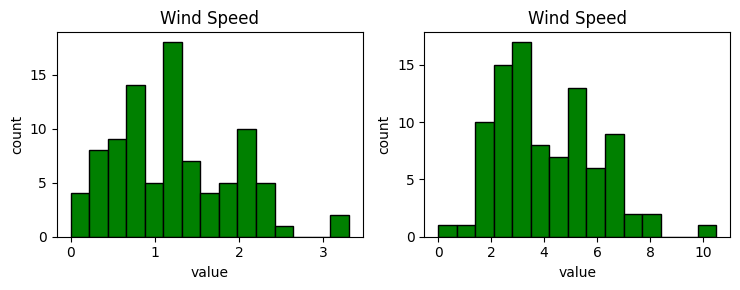

In [39]:
plt.rcParams["figure.figsize"] = [7.5, 3]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 2)
axis[0].hist(summer['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Speed")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(summer['gust_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Speed")
axis[1].set(xlabel='value', ylabel='count')

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

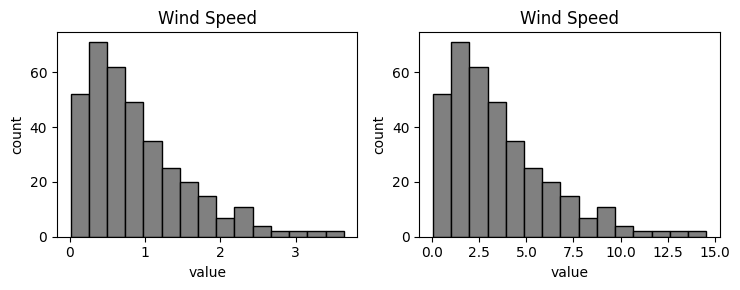

In [35]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(2)

s = np.random.weibull(1.29, 359)
d = s*4

plt.rcParams["figure.figsize"] = [7.5, 3]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 2)
axis[0].hist(s, color = 'grey', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Speed")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(d, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Speed")
axis[1].set(xlabel='value', ylabel='count')

## Associated Reading <a id="associated-reading"></a>

Flom, P. (2019). Are dates nominal, ordinal, interval or ratio? [online] Medium. Available at: https://medium.com/@peterflom/are-dates-nominal-ordinal-interval-or-ratio-ef567e10884 [Accessed 7 Nov. 2023].

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 8 Nov 2023].

numpy.org. (n.d.). Overview — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/index.html. [Accessed 8 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). API reference — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/index.html. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). How to handle time series data with ease — pandas 2.1.2 documentation. [online] Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). The real difference between float32 and float64. [online] Available at: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64 [Accessed 7 Nov. 2023].

---

*Notebook Ends*